In [1]:
import pandas as pd
import seaborn as sns

In [2]:
malware_df = pd.read_csv("data/IoT_Malware_Collection_2021.csv")
benign_df = pd.read_csv("data/IoT_Benign_Collection_2021.csv")
all_df = pd.concat([malware_df, benign_df], ignore_index=True)
all_df["Label"] = all_df["Label"].fillna("Benign")

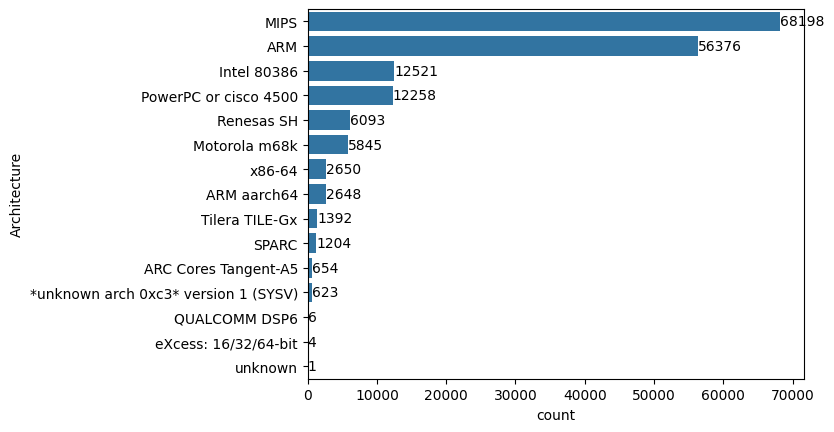

In [3]:
ax = sns.countplot(
    all_df, y="Architecture", order=all_df["Architecture"].value_counts().index
)
for i in ax.containers:
    ax.bar_label(i)

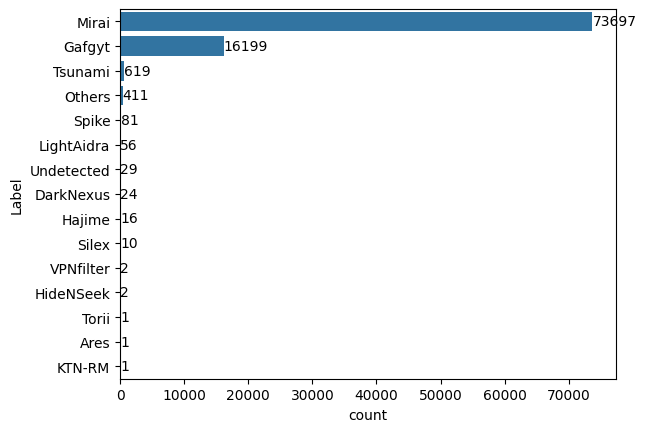

In [4]:
ax = sns.countplot(
    malware_df, y="Label", order=malware_df["Label"].value_counts().index
)
for i in ax.containers:
    ax.bar_label(i)

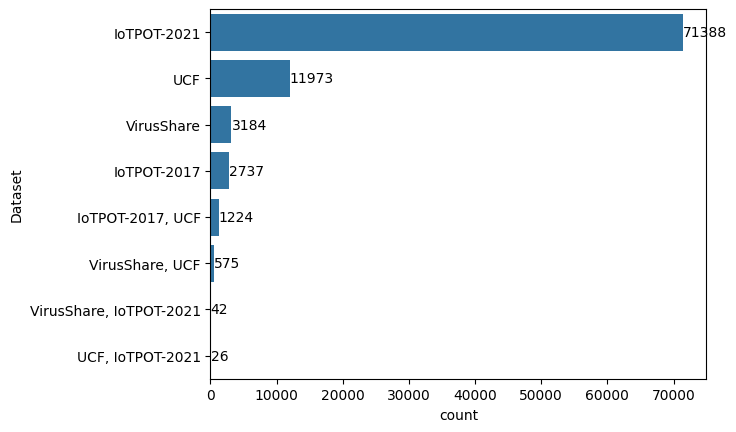

In [5]:
ax = sns.countplot(
    malware_df, y="Dataset", order=malware_df["Dataset"].value_counts().index
)
for i in ax.containers:
    ax.bar_label(i)

In [9]:
malware_df["Year"] = malware_df["Date"].apply(lambda x: x[:4])
malware_df["Year"].value_counts()

Year
2021    26738
2019    22062
2020    21219
2018    11927
2017     8593
2016      598
2015        6
2014        2
2012        1
2009        1
2013        1
2010        1
Name: count, dtype: int64

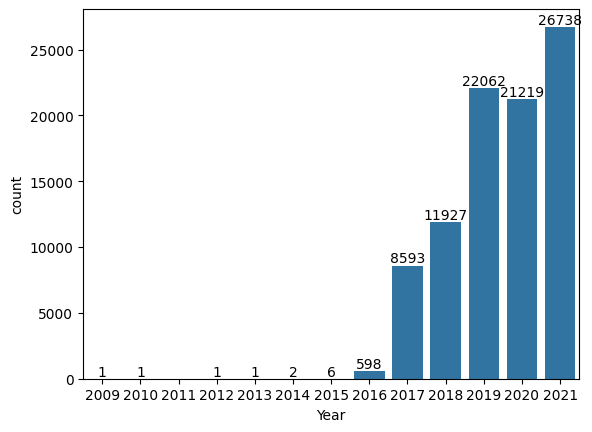

In [14]:
ax = sns.countplot(malware_df, x="Year", order=list(range(2009, 2022)))
for i in ax.containers:
    ax.bar_label(i)

In [5]:
import torch
import torchsummary
from Model import Net

device = "cuda" if torch.cuda.is_available() else "cpu"
net = Net().to(device)
torchsummary.summary(net, input_size=(1, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 62, 62]             320
              ReLU-2           [-1, 32, 62, 62]               0
         MaxPool2d-3           [-1, 32, 31, 31]               0
            Conv2d-4           [-1, 72, 29, 29]          20,808
              ReLU-5           [-1, 72, 29, 29]               0
         MaxPool2d-6           [-1, 72, 14, 14]               0
           Flatten-7                [-1, 14112]               0
            Linear-8                  [-1, 256]       3,612,928
              ReLU-9                  [-1, 256]               0
           Linear-10                    [-1, 2]             514
          Softmax-11                    [-1, 2]               0
Total params: 3,634,570
Trainable params: 3,634,570
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forw